In [1]:
# Artificial Intelligence Coursework

# 1.Linear Regression: Predicting California Housing Prices

# Importing relevant libraries
import pandas as pd
import numpy as np

# Loading and exploring the data

# Importing the dataset
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)

#print(california_housing)

# Converting it into a Pandas Dataframe
data=california_housing.frame
print(data)

# The dataset has 20640 rows and 9 columns

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0      

In [2]:
# Checking information about the dataset such as the types of the features and if there are any missing values
print(data.info())

#There are no missing values in the dataset and all features are of type "float"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [3]:
# Checking for duplicate rows in the dataset
duplicate_rows=data[data.duplicated()]  #creating a dataframe to store these rows

# Counting the number of the duplicated rows
number_of_duplicated=duplicate_rows.shape[0]

print("The number of the duplicate rows in the dataset are:", number_of_duplicated)


# There are now duplicate rows in the dataset


The number of the duplicate rows in the dataset are: 0


In [4]:
#Checking the statistics for all features
print(data.describe())


             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [5]:
# Calculating summary statistics for the 2 variables(these can be verified from above)
# Calculating the mean
income_mean=data["MedInc"].mean()
print("The mean of the Median Income is:",income_mean)
house_value_mean=data["MedHouseVal"].mean()
print("The mean of the Median Household Value is:",house_value_mean)


# Calculating the standard deviation
income_std = data["MedInc"].std()
print("The standard deviation of the Median Income is:",income_std)
house_value_std=data["MedHouseVal"].std()
print("The standard deviation of the Median Household Value is:",house_value_std)

# Calculating the median

income_median = data["MedInc"].median()
print("The median of the Median Income is:", income_median)
house_value_median=data["MedHouseVal"].median()
print("The median of the Median Household Value is:",house_value_median)

The mean of the Median Income is: 3.8706710029070246
The mean of the Median Household Value is: 2.0685581690891843
The standard deviation of the Median Income is: 1.8998217179452732
The standard deviation of the Median Household Value is: 1.1539561587441483
The median of the Median Income is: 3.5347999999999997
The median of the Median Household Value is: 1.797


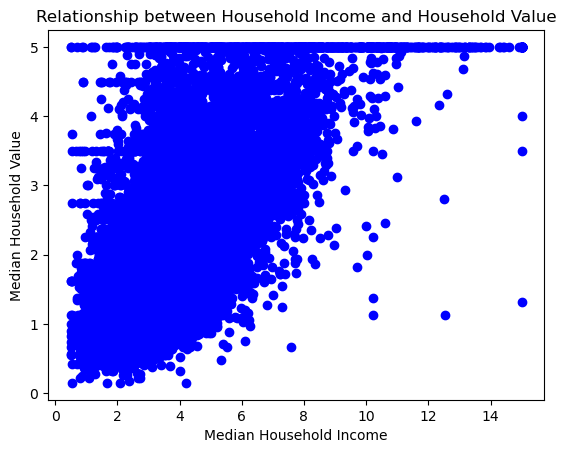

In [6]:
# Exploring the relationship between MedInc and MedHouseVal using a scatterplot

import matplotlib.pyplot as plt

ax=plt.axes() #creating the axes
# creating the scatterplot
plt.scatter(data.MedInc, data.MedHouseVal,c='blue') #specifying the 2 features for the plot and the colour

ax.set_xlabel("Median Household Income") # specifying the title for the x-axis
ax.set_ylabel("Median Household Value") # specifying the title for the y-axis
ax.set_title('Relationship between Household Income and Household Value') #setting the title of the plot
plt.show() #displaying the plot

In [10]:
# From the scatterplot we can see there is a positive correlation between the 2 features, 
# which indicates that when the household income increases so does the value of the Household

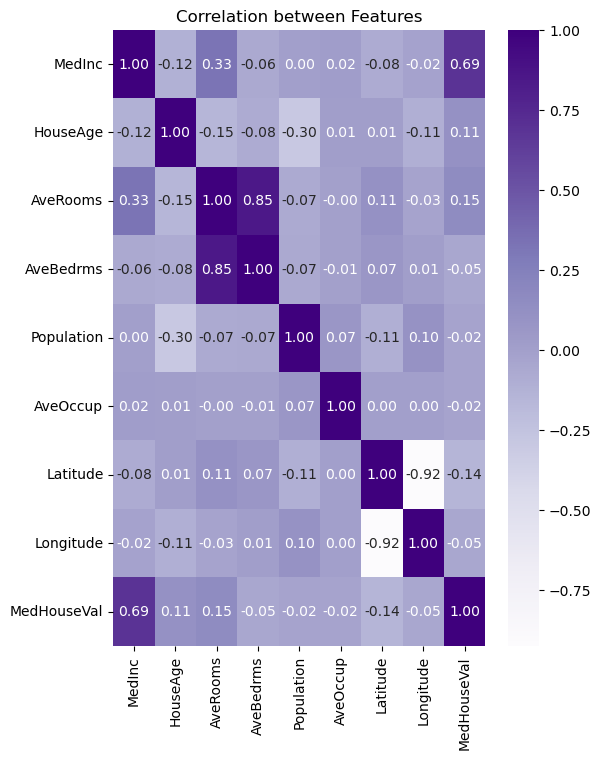

In [7]:
# Creating a correlation matrix to check correlation between all the features
import seaborn as sns

correlation_matrix=data.corr() # computing correlation

# Visualising the correlation matrix
plt.figure(figsize=(6,8)) # creating a figure
sns.heatmap(correlation_matrix, annot=True, cmap="Purples", fmt=".2f") # creating a heatmap
plt.title("Correlation between Features") # specifying the title of the plot
plt.show() # displaying the plot


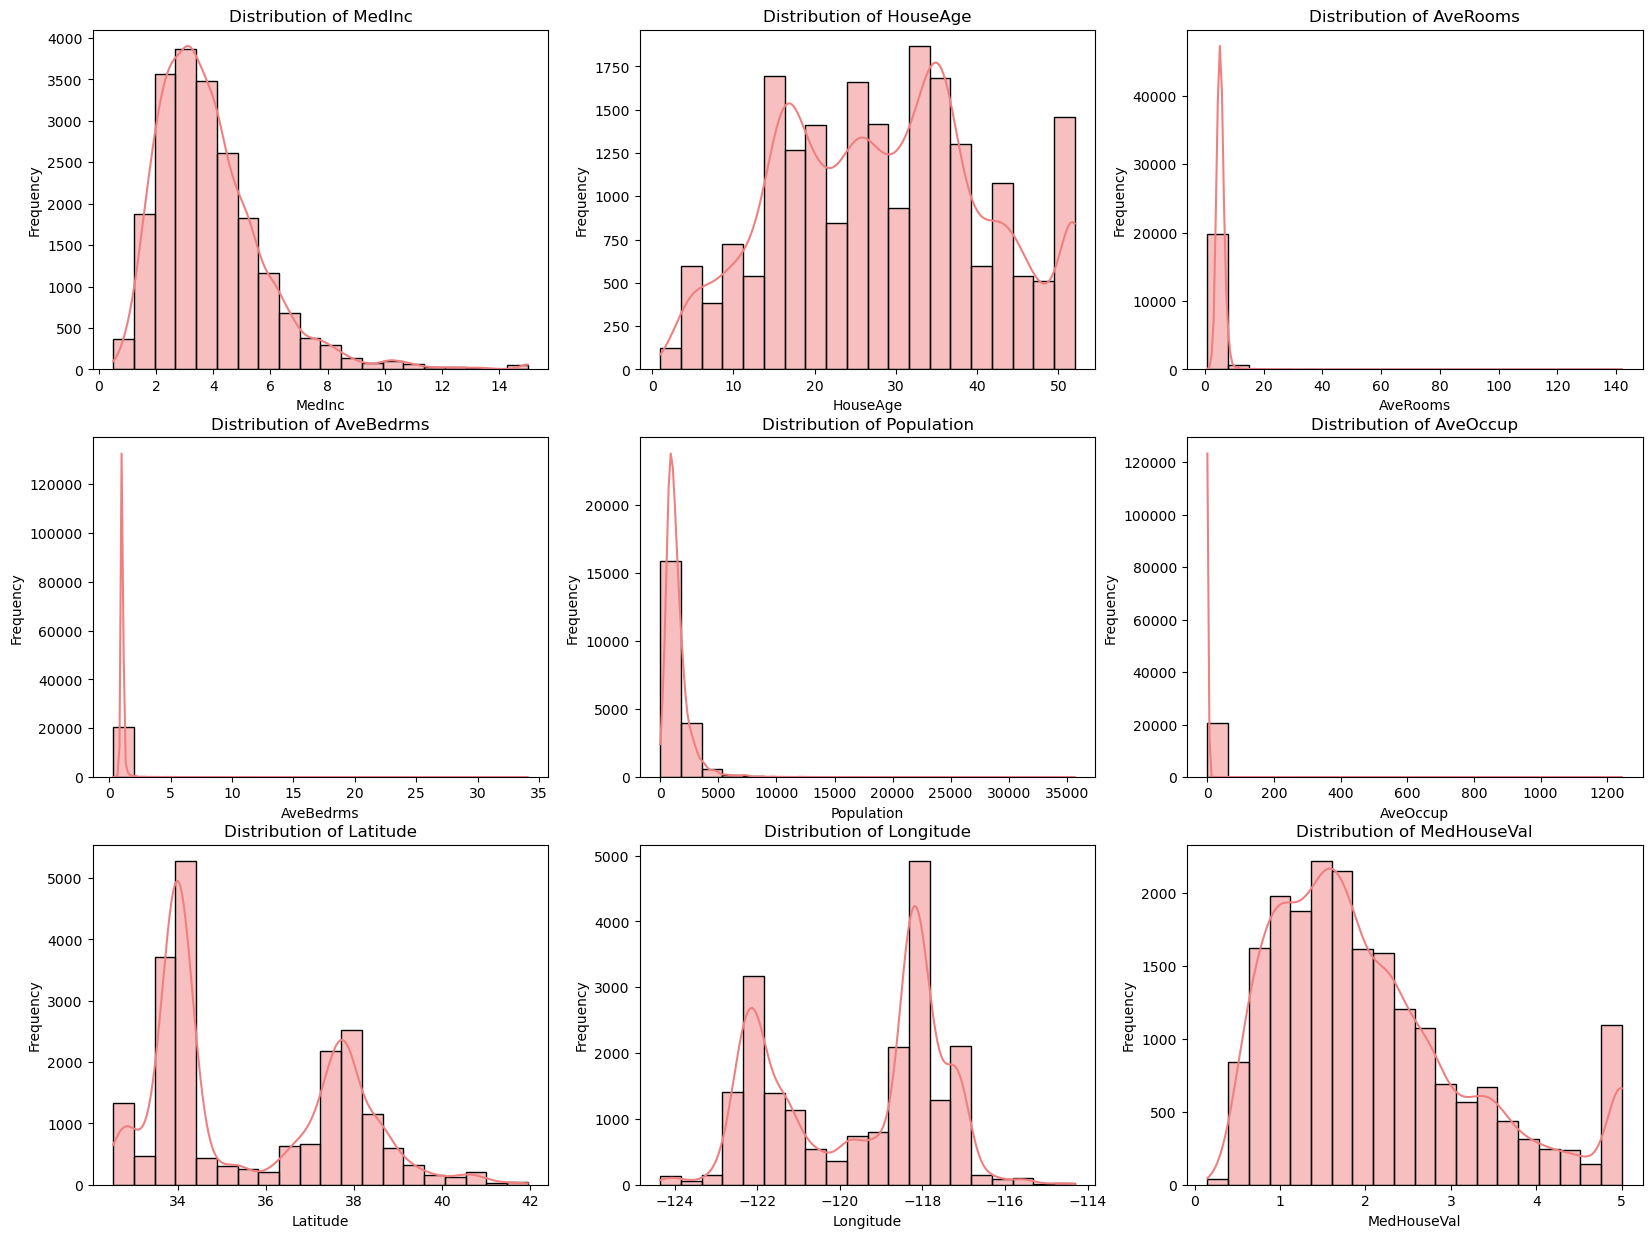

In [8]:
# Visualising the distribution of all the numerical features: "MedInc" and "MedHouseVal"
import seaborn as sns

plt.figure(figsize=(20,15)) # creating the figure

for i, column in enumerate(data.columns, 1): # looping through each column and plotting a histogram
    plt.subplot(3, 3, i)  # creating a grid with 3 rows and 3 subplots in each row
    sns.histplot(data[column], kde = True, bins = 20, color="lightcoral") # creating a hitogram for each subplot
    
    
    plt.title(f"Distribution of {column}") #specifying title for each subplot
    plt.xlabel(column)  # specifying the label for the x-axis which is the name of the column
    plt.ylabel("Frequency") # specifying the label for the y-axis which is the occurence 
    
plt.show()  # displaying the plot



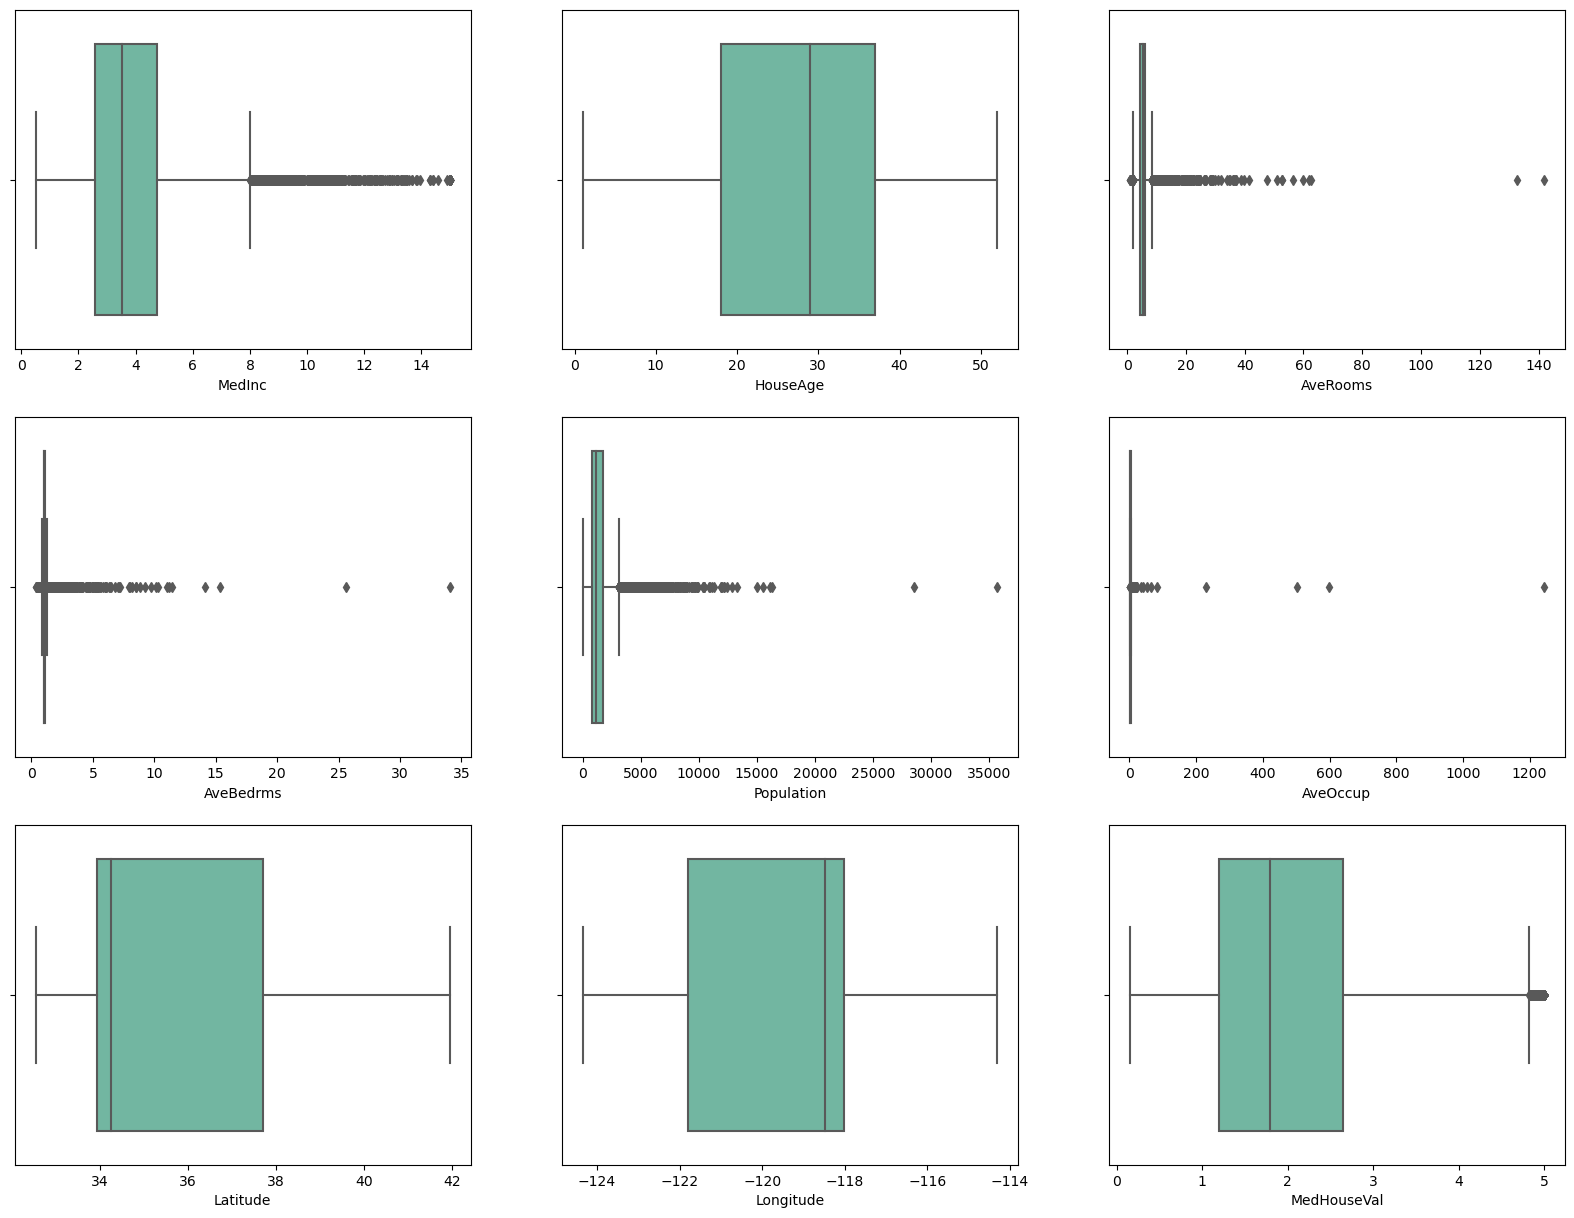

In [9]:
# Visualising distribution of the columns using boxplots ( to identify outliers )

plt.figure(figsize=(20,15))  # creating the figure

for j, column in enumerate (data.columns, 1):  # looping through all columns of the data and plotting a boxplot
    plt.subplot(3,3,j) # creating a grid with 3 rows and 3 subplots in each row
    sns.boxplot(x=data[column], palette = "Set2")  # creating a boxplot for each column
    
    
plt.show()  # displaying the plot


# We can see from the boxplots that there are outliers present in most of the columns, even MedInc

In [10]:
# Pre-processing the data
# Importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Using a random seed for reproducibility so we get same results during each run of the code to compare
np.random.seed(42) 

# Extracting the features and target
X=data[["MedInc"]].values # Using only one variable "MedInc" to predict the "MedHouseVal"
y=data["MedHouseVal"].values

# print(X)
# print(y)

# Splitting the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardising the features to have a mean of 0 and standard deviation of 1
standardiser = StandardScaler()
X_train_standardised = standardiser.fit_transform(X_train) # scalling the training set
X_test_standardised = standardiser.transform(X_test)  # scalling the testing set


#print(X_train_standardised)
#print(X_test_standardised)


Best parameters for GD:
Bias (GD): 2.0718919035697985
Weight (GD): [0.79849835]
Predicted house value for a district with a Median Income of 80,000 $379920.43
The Mean Squared Error (MSE) using GD is: 0.709115678871153
The R-squared (R²) using GD is: 0.45885926405733735
The Mean Absolute Error (MAE) using GD is: 0.6298987843374333


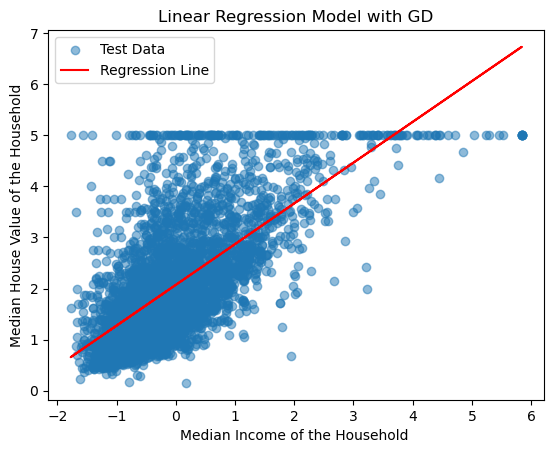

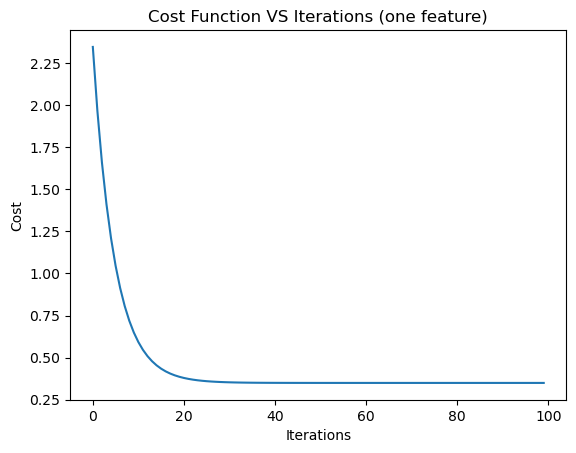

In [11]:
# Building the Linear Regression model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Using Batch Gradient Descent

# Initiating the values for the parameters: bias and weight
np.random.seed(42) # using a random seed for the reproducibility
bias = 0 # setting the bias to be 0
weight = np.zeros((X_train_standardised.shape[1], 1)) # setting the weight to be 0 as well
# ensuring that it is consistent with the number of features, having a shape of (n_features,1) as we have multiple weights, one for each feature

# Defining a function that computes the cost ( for LR this is the MSE: Mean Squared Error)
def cost(X,y,bias,weight):
    m = len(y)  # setting m to be the number of training examples in the dataset
    predicted_value = bias + X.dot(weight) # making predictions using the current parameters and the hypothesis function
    error = predicted_value - y.reshape(-1,1) # computing the difference between the predicted values and actual
    cost_function = (1 / (2 * m)) * np.sum(error ** 2) # computing the cost function
    return cost_function # returning the value of the cost function

# Defining the function that computes the gradient of the cost function
def gradient(X,y,bias,weight):
    m=len(y)  # setting m to be the number of training examples in the dataset
    predicted_value = bias + X.dot(weight) # making predictions using the current parameters and the hypothesis function
    error = predicted_value - y.reshape(-1,1) # computing the difference between the predicted values and actual
    bias_gradient = (1 / m) * np.sum(error) # computing gradient with respect to the bias
    weight_gradient= (1 / m) * X.T.dot(error) # computing gradient with respect to the weight 
    return bias_gradient, weight_gradient

# Defining the Gradient Descent rule to update the parameters
def  Gradient_Descent_algorithm(X, y, bias, weight, learning_rate=0.1, iterations=100): 
    m=len(y) # setting m to be the number of training examples in the dataset
    cost_array=[] #creating an array to store the cost through each iteration
    
    for i in range(iterations):  # looping through each iteration 
        bias_gradient, weight_gradient = gradient(X, y, bias, weight) # applying the gradient function to
                                                                      # compute gradients with respect to the 2 parameters
        # updating the parameters based on computed gradients
        bias -= learning_rate * bias_gradient
        weight -= learning_rate * weight_gradient
        
        # computing the cost for the respective iteration
        cost_iteration = cost (X, y, bias, weight)
        # appending the computed cost to the array created initially 
        cost_array.append(cost_iteration)
        
    return bias, weight, cost_array

# Running the GD algorithm to find the parameters that minimise the MSE
bias, weight, cost_array = Gradient_Descent_algorithm(X_train_standardised, y_train, bias, weight, learning_rate=0.1, iterations=100)

# Displaying the parameters found 
print(f"Best parameters for GD:")
print(f"Bias (GD): {bias}")
print(f"Weight (GD): {weight[0]}")

# Predicting the house values for the test set
y_predicted = bias + X_test_standardised.dot(weight)

# Predicting the house value for a district with a median income of 80,000 (MedInc=8.0)
specific_median_income = np.array([[8.0]])  # creating an array that contains a specific value for the median income
standardised_income = standardiser.transform(specific_median_income)  # standardising this value for consistency
predicted_house_value = bias + standardised_income.dot(weight)  # Predicting the house value given the specific income
print(f"Predicted house value for a district with a Median Income of 80,000 ${predicted_house_value[0][0] * 100_000:.2f}")

# Evaluating the performance of the model by computing the MSE and the R2
# The MSE is the cost function, the diference between the predicted values and the actual ones
# R2 shows how much of the variance in the target variable is explained by the feature
# The MAE is the absolute value of the error: the difference between the predicted and actual values
# When we have outliers the MAE is the more accurate metric to evaluate the accuracy of the model
MSE = mean_squared_error(y_test, y_predicted)
R2 = r2_score(y_test, y_predicted)
MAE = mean_absolute_error(y_test, y_predicted)

# Displaying evaluation metrics
print(f"The Mean Squared Error (MSE) using GD is: {MSE}")
print(f"The R-squared (R²) using GD is: {R2}")
print(f"The Mean Absolute Error (MAE) using GD is: {MAE}")

# Visualising the results 
# Plotting the regression line overlaid on the test data scatter plot
plt.scatter(X_test_standardised[:, 0], y_test, alpha=0.5, label='Test Data') # creating the scatter plot
# Creating the regression Line for the test data
plt.plot(X_test_standardised[:, 0], y_predicted, color='red', label='Regression Line')
plt.xlabel('Median Income of the Household ') # specifying the title for x-axis
plt.ylabel('Median House Value of the Household') # specifying the title for the y-axis
plt.title('Linear Regression Model with GD') # specifying the title for the whole plot
plt.legend() # adding a legend
plt.show()  # displaying the plot

# Seeing how the cost function changes during the different iterations and whether it converges
plt.plot(cost_array) # creating the plot
plt.xlabel('Iterations') # specifying the title for x-label
plt.ylabel('Cost') #specifying the title for the y-label
plt.title('Cost Function VS Iterations (one feature)') # specifying the title of the plot
plt.show() #displaying the plot


Best parameters for SGD:
Bias (SGD): [[2.046666]]
Weight (SGD): [0.77248961]
Predicted house value for a district with a Median Income of 80,000 (SGD) $371771.63
The Mean Squared Error (MSE) of the model trained using SGD is: 0.7099022474527171
The R-squared (R²) of the model trained using SGD is: 0.4582590174208865
The Mean Absolute Error (MSE) of the model trained using SGD is: 0.62691222063883


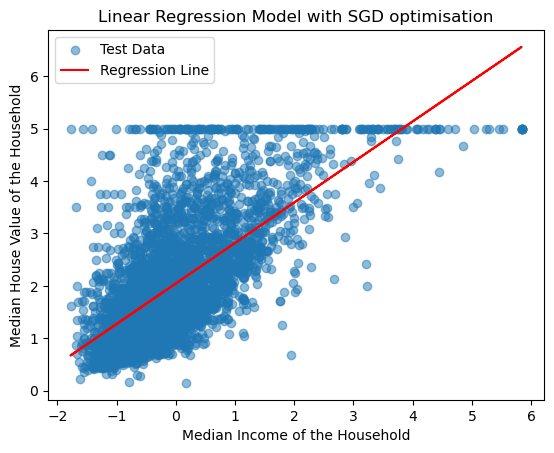

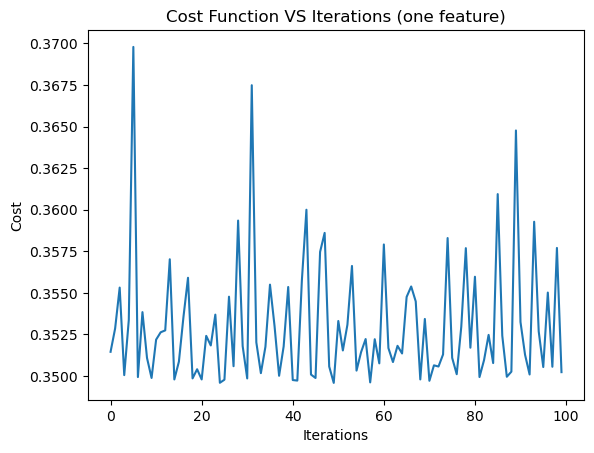

In [12]:
# Using Stochastic Gradient Descent (SGD)

# Initialising the values for the parameters for the SGD model
np.random.seed(42)
bias_SGD = 0  # setting initially the bias to be 0
weight_SGD = np.zeros((X_train_standardised.shape[1], 1)) # setting weight to 0 as well
# ensuring that it is consistent with the number of features, having a shape of (n_features,1)

# Defining the function that computes the cost
def cost_SGD (X, y, bias_SGD, weight_SGD):
    n = len(y) # setting the number of training examples
    predicted_value_SGD = bias_SGD + X.dot(weight_SGD) # making predictions
    error_SGD = predicted_value_SGD - y.reshape(-1,1) # computing the difference betwen the predicted values and the actual (error)
    cost_function_SGD = (1 / (2 * n)) * np.sum(error_SGD ** 2) #computing the cost function 
    return cost_function_SGD

# Defining the function that computes the gradient of the cost function but only for 1 example (X_j and y_j)
def gradient_SGD(X_j, y_j, bias_SGD, weight_SGD):
    n = len(y) # setting the number of training examples
    predicted_value_SGD = bias_SGD + X_j.dot(weight_SGD)  # making predictions
    error_SGD = predicted_value_SGD - y_j.reshape(-1,1) # computing the difference betwen the predicted values and the actual (error)
    bias_gradient_SGD = error_SGD # computing the gradient(partial derivative of the cost function) with respect to the bias
    weight_gradient_SGD = X_j.T.dot(error_SGD) #  computing the gradient(partial derivative of the cost function) with respect to the weight
    return bias_gradient_SGD, weight_gradient_SGD
    

# Defining the function that performs the Gradient Descent algorithm in order to update the parameters
def SGD_algorithm(X, y, bias_SGD, weight_SGD, learning_rate_SGD=0.01, iterations_SGD=100):
    n = len(y) # setting the number of training examples
    cost_array_SGD =[] # initiating the array that stores the cost for each iteration 
    
    for iteration in range (iterations_SGD):
        np.random.seed(42 + iteration) # adding a random seed so that the shuffling is reproducible during different runs
        # Shuffling the data at the beggining of each iteration
        indices = np.random.permutation(n)  # extracting random indices
        X_shuffled = X[indices] # shuffling the features and target using these indices
        y_shuffled = y[indices]
        
        # Looping through one example each time 
        for j in range(n): # looping through the number of training examples
            X_j = X_shuffled[j].reshape(1, -1)  # extracting the j-th training example
            y_j = y_shuffled[j]  # extracting the j-th target
            
            # Computing the gradient for this example
            bias_gradient_SGD, weight_gradient_SGD = gradient_SGD(X_j, y_j, bias_SGD, weight_SGD)
            
            # Updating the parameters based on the gradient for the specific example
            bias_SGD -= learning_rate_SGD * bias_gradient_SGD
            weight_SGD -= learning_rate_SGD * weight_gradient_SGD
            
        
        # Computing the cost function for this iteration
        cost_iteration_SGD = cost_SGD(X, y, bias_SGD, weight_SGD)
        cost_array_SGD.append(cost_iteration_SGD)
        
    return bias_SGD, weight_SGD, cost_array_SGD

# Running the SGD model to find best parameters that minimise the cost function 

bias_SGD, weight_SGD, cost_array_SGD = SGD_algorithm(X_train_standardised, y_train, bias_SGD, weight_SGD, learning_rate_SGD=0.01, iterations_SGD=100)

# Displaying the best parameters found for the weight and the bias
print(f"Best parameters for SGD:")
print(f"Bias (SGD): {bias_SGD}")
print(f"Weight (SGD): {weight_SGD[0]}")

# Predicting the house values for the test set
y_predicted_SGD = bias_SGD + X_test_standardised.dot(weight_SGD)

# Predicting the house value for a district with a median income for 80,000 $ ("MedInc"=8.0)
specific_median_income_SGD = np.array([[8.0]]) # creating an array with the specific value for the MedInc
standardised_income_SGD = standardiser.transform(specific_median_income_SGD) # strandardising
predicted_house_value_SGD = bias_SGD + standardised_income_SGD.dot(weight_SGD) # predicting the House value for this specific income
print(f"Predicted house value for a district with a Median Income of 80,000 (SGD) ${predicted_house_value_SGD[0][0] * 100_000:.2f}")

# Evaluating the performance of the model by finding the MSE, R2 and MAE
MSE_SGD = mean_squared_error(y_test, y_predicted_SGD)
MAE_SGD = mean_absolute_error(y_test, y_predicted_SGD)
R2_SGD = r2_score(y_test, y_predicted_SGD)

# Displaying the results
print(f"The Mean Squared Error (MSE) of the model trained using SGD is: {MSE_SGD}")
print(f"The R-squared (R²) of the model trained using SGD is: {R2_SGD}")
print(f"The Mean Absolute Error (MSE) of the model trained using SGD is: {MAE_SGD}")

# Visualising the results 
# Plotting the regression line overlaid on the test data scatter plot 
# Creating the scatter plot
plt.scatter(X_test_standardised[:, 0], y_test, alpha=0.5, label='Test Data')
# Creating the regression line
plt.plot(X_test_standardised[:, 0], y_predicted_SGD, color='red', label='Regression Line')
plt.xlabel('Median Income of the Household') # specifying title for the x-label
plt.ylabel('Median House Value of the Household')  # specifying title for the y-label
plt.title('Linear Regression Model with SGD optimisation') #specifying title for the scatter plot
plt.legend() # Adding a legend
# Displaying the plot
plt.show()


# Seeing how the cost function changes during the different iterations 
plt.plot(cost_array_SGD) # creating the plot
plt.xlabel('Iterations') # specifying the title for x-label
plt.ylabel('Cost') #specifying the title for the y-label
plt.title('Cost Function VS Iterations (one feature)') # specifying the title of the plot
plt.show() #displaying the plot



In [ ]:
# Discussing Results


# The results we get from the 2 models (GD vs SGD) are very close to each other
# For both the 2 models , R-squared was found to be approximately 0.45 so only 45 % of the variation is captured by the models
# These results seem logical given that only one feature was used for the prediction of the House Value
# Therefore, Income alone does not fully explain the house prices, other features play a significant role
# The Mean Squared erorr is found to be 0.7 approximately for both the 2 models
# I consider that adding more features should improve the performance of the model, by increasing R2 and minimising the Cost Function (MSE)



In [31]:
# Investigating what would be approximately the value of a House with median income of 80,000 so we can see how accurate are the predictions of the 2 models

actual_house_value=data[(data["MedInc"]>8) & (data["MedInc"]<8.1)]
# checking for values equal approximately to 8.0
# finding the mean of these values
print(actual_house_value.mean())



MedInc            8.044128
HouseAge         27.923077
AveRooms          7.224296
AveBedrms         1.034041
Population     1516.153846
AveOccup          2.850559
Latitude         35.600513
Longitude      -119.907949
MedHouseVal       4.325106
dtype: float64


In [51]:
# We can see from the dataset that households with approximately 8.0 Med Inc have a house value with mean approximately 4.32

# The Linear Regression model using GD has predicted the household value for a house of MedInc=8.0 to be approximately 3.8 so the error
# in the prediction of the model is of approximately 52.000 $ 

# The linear Regression model using SGD has predicted the household value for a house of MedInc=8.0 to be approximately 3.71
# so the error in the prediction of the model is a bit higher with a value of 61.000 $

In [13]:
# Exploring features that could be added to the model to capture more of the variation and increase performance

# Finding the top correlated numerical variables with "MedHouseVal"

correlation=data.corr()
print (correlation['MedHouseVal'].sort_values(ascending=False))

# MedInc has the highest correlation with the Target but alone it does not fully explain the house prices
# After this variable, the next ones that has the highest positive correlations are the "AveRooms" and "HouseAge" variables

# However we need to ensure that the chosen variables won't be highly correlated as well with "MedInc" 
# in order to capture other variation


MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


In [14]:
# Finding the top correlated variables with "MedInc"

print(correlation["MedInc"].sort_values(ascending=False))

#"AveRooms" has a positive correlation of only 0.32 with "MedInc" and "HouseAge" has a negative correlation of 0.11
# So these 2 features are good to add to the model

MedInc         1.000000
MedHouseVal    0.688075
AveRooms       0.326895
AveOccup       0.018766
Population     0.004834
Longitude     -0.015176
AveBedrms     -0.062040
Latitude      -0.079809
HouseAge      -0.119034
Name: MedInc, dtype: float64


In [15]:
# Re-building the Linear Regression model adding 2 more features

# Using a random seed for reproducibility so we get same results during each run of the code to compare
np.random.seed(42) 

# Extracting the features and target
X=data[["MedInc","AveRooms","HouseAge"]].values # using 3 variables now to predict the "MedHouseVal"
y=data["MedHouseVal"].values

# print(X)
# print(y)

# Splitting the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardising the features to have a mean of 0 and standard deviation of 1
standardiser = StandardScaler()
X_train_standardised = standardiser.fit_transform(X_train) # scalling the training set
X_test_standardised = standardiser.transform(X_test)  # salling the testing set


#print(X_train_standardised)
#print(X_test_standardised)



Best parameters for GD (using additional features):
Bias : 2.0718919035698042
Weight (GD): [ 0.84646861 -0.06674095  0.21220417]
The Mean Squared Error (MSE) using GD (with additional features) is: 0.6588920191877562
The Mean Absolute Error (MAE) using GD (with additional features) is: 0.6033352623350507
The R-squared (R²) using GD (with additional features) is: 0.4971859700837393


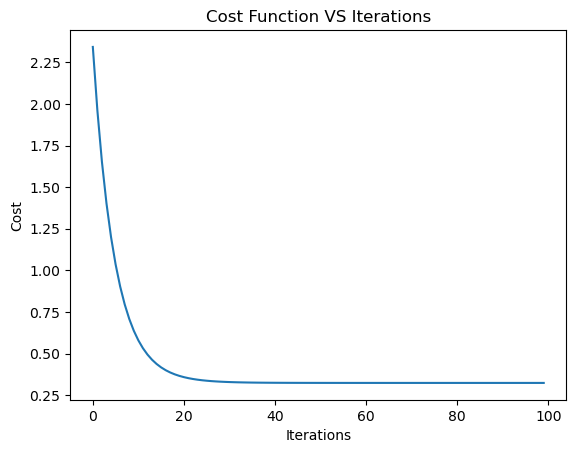

In [16]:
# Linear Regression model using Gradient Descent (with 3 features)

# Initiating the values for the parameters: bias and weight
np.random.seed(42)
bias = 0 # setting the bias to be 0
weight =np.zeros((X_train_standardised.shape[1], 1))  # setting the weight to be 0 as well

# ensuring that it is consistent with the number of features, having a shape of (n_features,1)

# Defining a function that computes the cost ( for LR this is the MSE: Mean Squared Error)
def cost(X,y,bias,weight):
    m = len(y)  # setting m to be the number of training examples in the dataset
    predicted_value = bias + X.dot(weight) # making predictions using the current parameters and the hypothesis function
    error = predicted_value - y.reshape(-1,1) # computing the difference between the predicted values and actual
    cost_function = (1 / (2 * m)) * np.sum(error ** 2) # computing the cost function
    return cost_function # returning the value of the cost function

# Defining the function that computes the gradient of the cost function
def gradient(X,y,bias,weight):
    m=len(y)  # setting m to be the number of training examples in the dataset
    predicted_value = bias + X.dot(weight) # making predictions using the current parameters and the hypothesis function
    error = predicted_value - y.reshape(-1,1) # computing the difference between the predicted values and actual
    bias_gradient = (1 / m) * np.sum(error) # computing gradient with respect to the bias
    weight_gradient= (1 / m) * X.T.dot(error) # computing gradient with respect to the weight 
    return bias_gradient, weight_gradient

# Defining the Gradient Descent rule to update the parameters
def  Gradient_Descent_algorithm(X, y, bias, weight, learning_rate=0.1, iterations=100): 
    m=len(y) # setting m to be the number of training examples in the dataset
    cost_array=[] # creating an array to store the cost over the iterations
    
    for i in range(iterations): # looping through the number of iterations
        bias_gradient, weight_gradient = gradient(X, y, bias, weight) # computing the gradient with respect to the 2 parameters
        
        # updating the parameters
        bias -= learning_rate * bias_gradient 
        weight -= learning_rate * weight_gradient
        
        # computing the cost for this iteration
        cost_iteration = cost (X, y, bias, weight)
        
        # adding this cost to the created array
        cost_array.append(cost_iteration)
        
    return bias, weight, cost_array

# Running the GD algorithm to find the parameters that minimise the MSE
bias, weight, cost_array = Gradient_Descent_algorithm(X_train_standardised, y_train, bias, weight, learning_rate=0.1, iterations=100)

# Displaying the parameters found 
print(f"Best parameters for GD (using additional features):")
print(f"Bias : {bias}")
print(f"Weight (GD): {weight.flatten()}") # displaying all 3 weights for the 3 different features

# Predictig the house values for the test set
y_predicted = bias + X_test_standardised.dot(weight)

# Evaluating the performance of the model by computing the MSE and the R2
MSE = mean_squared_error(y_test, y_predicted)
R2 = r2_score(y_test, y_predicted)
MAE =  mean_absolute_error(y_test, y_predicted)
# Displaying evaluation metrics
print(f"The Mean Squared Error (MSE) using GD (with additional features) is: {MSE}")
print(f"The Mean Absolute Error (MAE) using GD (with additional features) is: {MAE}")
print(f"The R-squared (R²) using GD (with additional features) is: {R2}")

# Seeing how the cost function changes during the different iterations 
plt.plot(cost_array) # creating the plot
plt.xlabel('Iterations') # specifying the title for x-label
plt.ylabel('Cost') #specifying the title for the y-label
plt.title('Cost Function VS Iterations') # specifying the title of the plot
plt.show() #displaying the plot

# Adding the 2 new features, has increased R-squared . The model captures now almost 50% of the variation 
# The Mean- Squared Error has also decreased and is now at 0.65

Best parameters for SGD:
Bias (SGD): [[2.04276157]]
Weight (SGD): [ 0.84344739 -0.02775327  0.27851737]
The Mean Squared Error (MSE) of the model (with additional features) trained using SGD is: 0.6649665333119482
The R-squared (R²) of the model (with additional features) trained using SGD is: 0.4925503836179427
The Mean Absolute Error (MAE) of the model (with additional features) trained using SGD is: 0.6013527773663092


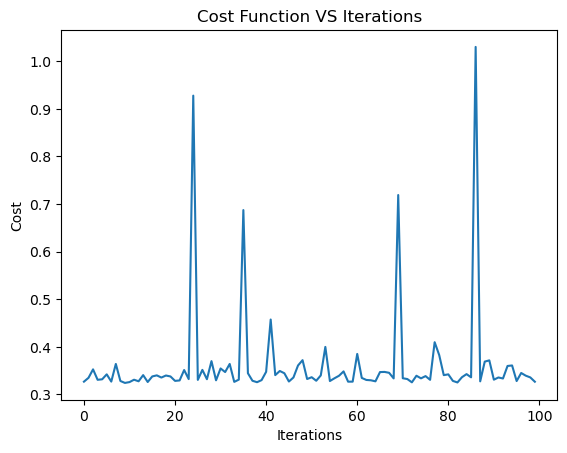

In [40]:
# Linear Regression model using Stochastic Gradient Descent (with 3 features)

# Initialising the values for the parameters for the SGD model
np.random.seed(42)
bias_SGD = 0  # setting initially the bias to be 0
weight_SGD = np.zeros((X_train_standardised.shape[1], 1)) # setting the weight to be 0 as well
# ensuring that it is consistent with the number of features, having a shape of (n_features,1)

# Defining the function that computes the cost
def cost_SGD (X, y, bias_SGD, weight_SGD):
    n = len(y) # setting the number of training examples
    predicted_value_SGD = bias_SGD + X.dot(weight_SGD) # making predictions
    error_SGD = predicted_value_SGD - y.reshape(-1,1) # computing the difference betwen the predicted values and the actual (error)
    cost_function_SGD = (1 / (2 * n)) * np.sum(error_SGD ** 2) #computing the cost function 
    return cost_function_SGD

# Defining the function that computes the gradient of the cost function but only for 1 example (X_j and y_j)
def gradient_SGD(X_j, y_j, bias_SGD, weight_SGD):
    n = len(y) # setting the number of training examples
    predicted_value_SGD = bias_SGD + X_j.dot(weight_SGD)  # making predictions
    error_SGD = predicted_value_SGD - y_j.reshape(-1,1) # computing the difference betwen the predicted values and the actual (error)
    bias_gradient_SGD = error_SGD # computing the gradient(partial derivative of the cost function) with respect to the bias
    weight_gradient_SGD = X_j.T.dot(error_SGD) #  computing the gradient(partial derivative of the cost function) with respect to the weight
    return bias_gradient_SGD, weight_gradient_SGD
    

# Defining the function that performs the Gradient Descent algorithm in order to update the parameters
def SGD_algorithm(X, y, bias_SGD, weight_SGD, learning_rate_SGD=0.01, iterations_SGD=100):
    n = len(y) # setting the number of training examples
    cost_array_SGD =[] # initiating the array that stores the cost for each iteration 
    
    for iteration in range (iterations_SGD):
        np.random.seed(42 + iteration) # adding a random seed so that the shuffling is reproducible during different runs
        # Shuffling the data at the beggining of each iteration
        indices = np.random.permutation(n)  # extracting random indices
        X_shuffled = X[indices] # shuffling the features and target using these indices
        y_shuffled = y[indices]
        
        # Looping through one example each time 
        for j in range(n): # looping through the number of training examples
            X_j = X_shuffled[j].reshape(1, -1)  # extracting the j-th training example
            y_j = y_shuffled[j]  # extracting the j-th target
            
            # Computing the gradient for this example
            bias_gradient_SGD, weight_gradient_SGD = gradient_SGD(X_j, y_j, bias_SGD, weight_SGD)
            
            # Updating the parameters 
            bias_SGD -= learning_rate_SGD * bias_gradient_SGD
            weight_SGD -= learning_rate_SGD * weight_gradient_SGD
            
        
        # Computing the cost function for this iteration
        cost_iteration_SGD = cost_SGD(X, y, bias_SGD, weight_SGD)
        cost_array_SGD.append(cost_iteration_SGD)
        
    return bias_SGD, weight_SGD, cost_array_SGD

# Running the SGD model to find best parameters that minimise the cost function 

bias_SGD, weight_SGD, cost_array_SGD = SGD_algorithm(X_train_standardised, y_train, bias_SGD, weight_SGD, learning_rate_SGD=0.01, iterations_SGD=100)

# Displaying the best parameters found for the weight and the bias
print(f"Best parameters for SGD:")
print(f"Bias (SGD): {bias_SGD}")
print(f"Weight (SGD): {weight_SGD.flatten()}") # displaying all 3 weights for the 3 different features

# Predicting the house values for the test set
y_predicted_SGD = bias_SGD + X_test_standardised.dot(weight_SGD)

# Evaluating the performance of the model by finding the MSE and R2
MSE_SGD = mean_squared_error(y_test, y_predicted_SGD)
R2_SGD = r2_score(y_test, y_predicted_SGD)
MAE_SGD = mean_absolute_error(y_test, y_predicted_SGD)

# Displaying the results
print(f"The Mean Squared Error (MSE) of the model (with additional features) trained using SGD is: {MSE_SGD}")
print(f"The R-squared (R²) of the model (with additional features) trained using SGD is: {R2_SGD}")
print(f"The Mean Absolute Error (MAE) of the model (with additional features) trained using SGD is: {MAE_SGD}")

# Seeing how the cost function changes during the different iterations 
plt.plot(cost_array_SGD) # creating the plot
plt.xlabel('Iterations') # specifying the title for x-label
plt.ylabel('Cost') #specifying the title for the y-label
plt.title('Cost Function VS Iterations') # specifying the title of the plot
plt.show() #displaying the plot

In [ ]:
# Adding additional features, increased the R squared of the model using SGD as well 
# The model captures now almost 50% of the variation and has a lower Mean-Squared error of 0.66



In [17]:
# Investigating additional features to find the best model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Using a random seed for reproducibility so we get same results during each run of the code to compare
np.random.seed(42) 

# Extracting the features and target
X = data[["MedInc","AveRooms","HouseAge","Population","Latitude","Longitude"]].values # adding more features 
y=data["MedHouseVal"].values

# print(X)
# print(y)

# Splitting the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardising the features to have a mean of 0 and standard deviation of 1
standardiser = StandardScaler()
X_train_standardised = standardiser.fit_transform(X_train) # scalling the training set
X_test_standardised = standardiser.transform(X_test)  # salling the testing set


#print(X_train_standardised)
#print(X_test_standardised)



Best parameters for GD (final model):
Bias : 2.071891903569679
Weight (GD): [ 0.78356258 -0.01313842  0.17645895  0.01034112 -0.48825303 -0.44677315]
The Mean Squared Error (MSE) using GD (final model) is: 0.5771790208679077
The R-squared (R²) using GD (final model) is: 0.5595428370441142
The Mean Absolute Error (MAE) using GD (final model) is: 0.5560079779267804


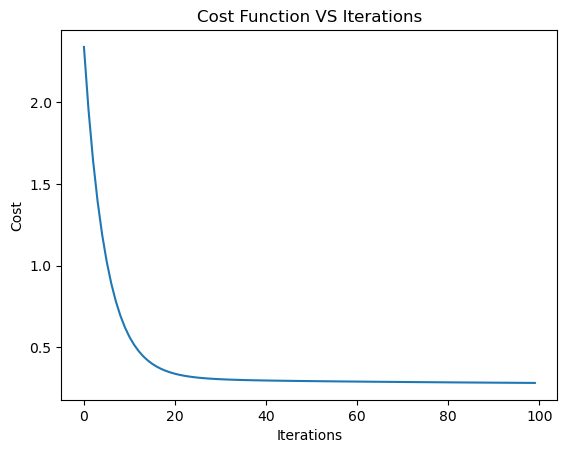

In [18]:
# Linear Regression model using Gradient Descent (final model)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initiating the values for the parameters: bias and weight
np.random.seed(42) 
bias = 0 # setting the bias to be 0
weight = np.zeros((X_train_standardised.shape[1], 1))  # setting the weight to be 0 as well
# ensuring that it is consistent with the number of features, having a shape of (n_features,1)

# Defining a function that computes the cost ( for LR this is the MSE: Mean Squared Error)
def cost(X,y,bias,weight):
    m = len(y)  # setting m to be the number of training examples in the dataset
    predicted_value = bias + X.dot(weight) # making predictions using the current parameters and the hypothesis function
    error = predicted_value - y.reshape(-1,1) # computing the difference between the predicted values and actual
    cost_function = (1 / (2 * m)) * np.sum(error ** 2) # computing the cost function
    return cost_function # returning the value of the cost function

# Defining the function that computes the gradient of the cost function
def gradient(X,y,bias,weight):
    m=len(y)  # setting m to be the number of training examples in the dataset
    predicted_value = bias + X.dot(weight) # making predictions using the current parameters and the hypothesis function
    error = predicted_value - y.reshape(-1,1) # computing the difference between the predicted values and actual
    bias_gradient = (1 / m) * np.sum(error) # computing gradient with respect to the bias
    weight_gradient= (1 / m) * X.T.dot(error) # computing gradient with respect to the weight 
    return bias_gradient, weight_gradient

# Defining the Gradient Descent rule to update the parameters
def  Gradient_Descent_algorithm(X, y, bias, weight, learning_rate=0.1, iterations=100): 
    m=len(y)   # setting m to be the number of training examples in the dataset
    cost_array=[] # creating an array to store the cost
    
    for i in range(iterations): # iterating through the number of iterations 
        bias_gradient, weight_gradient = gradient(X, y, bias, weight) # computing the gradients using the function created
        # updating the parameters
        bias -= learning_rate * bias_gradient
        weight -= learning_rate * weight_gradient
        # computing the cost for this iteration and adding it to the array
        cost_iteration = cost (X, y, bias, weight)
        cost_array.append(cost_iteration)
        
    return bias, weight, cost_array

# Running the GD algorithm to find the parameters that minimise the MSE
bias, weight, cost_array = Gradient_Descent_algorithm(X_train_standardised, y_train, bias, weight, learning_rate=0.1, iterations=100)

# Displaying the parameters found 
print(f"Best parameters for GD (final model):")
print(f"Bias : {bias}")
print(f"Weight (GD): {weight.flatten()}") # displaying all weights for all the different features

# Predicting the house values for the test set
y_predicted = bias + X_test_standardised.dot(weight)

# Evaluating the performance of the model by computing the MSE and the R2
MSE = mean_squared_error(y_test, y_predicted)
MAE = mean_absolute_error(y_test, y_predicted)
R2 = r2_score(y_test, y_predicted)

# Displaying evaluation metrics
print(f"The Mean Squared Error (MSE) using GD (final model) is: {MSE}")
print(f"The R-squared (R²) using GD (final model) is: {R2}")
print(f"The Mean Absolute Error (MAE) using GD (final model) is: {MAE}")

# Seeing how the cost function changes during the different iterations 
plt.plot(cost_array) # creating the plot
plt.xlabel('Iterations') # specifying the title for x-label
plt.ylabel('Cost') #specifying the title for the y-label
plt.title('Cost Function VS Iterations') # specifying the title of the plot
plt.show() #displaying the plot

# After trying different features to add to the model, the "best one" has a Mean-Squared error of 0.57
# The model captures 56% of the variation
# So overall there is an improvement in performance

# Different combinations of features have been explored and this is the one that returns the best results 

# AveBedrooms has a high correlation with AveRooms and since AveRooms has the highest correlation with the target I decided to add this one
# Longitude and Latitude have high negative correlation between them, however when added together the model returns a better performance despite their high correlation
# AveOcup has a low correlation with the target and when added to the model, doesnt enhance performance

Best parameters for SGD (final model):
Bias (SGD): [[2.0319877]]
Weight (SGD): [ 0.67756164  0.14957313  0.13249524  0.01881375 -1.0337353  -1.04784251]
The Mean Squared Error (MSE) of the model (final model) trained using SGD is: 0.5719841902630984
The R-squared (R²) of the model (final model) trained using SGD is: 0.5635071189523342
The Mean Absolute Error (MAE) of the model (final model) trained using SGD is: 0.5415002312395137


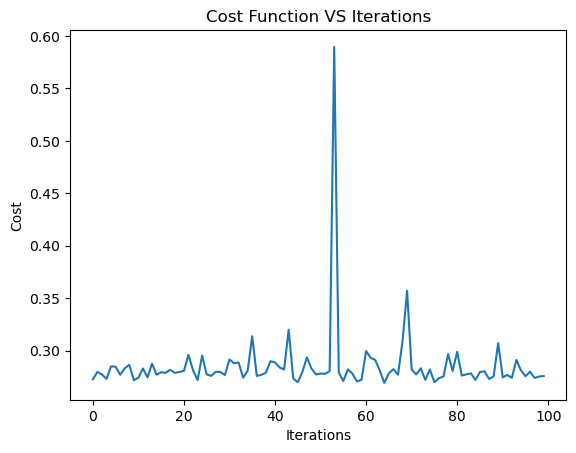

In [19]:
# Linear Regression model using SGD (final model)

# Initialising the values for the parameters for the SGD model
np.random.seed(42)
bias_SGD = 0  # setting initially the bias to be 0
weight_SGD = np.zeros((X_train_standardised.shape[1], 1))  # setting the weight to be 0 as well 

# ensuring that it is consistent with the number of features, having a shape of (n_features,1)

# Defining the function that computes the cost
def cost_SGD (X, y, bias_SGD, weight_SGD):
    n = len(y) # setting the number of training examples
    predicted_value_SGD = bias_SGD + X.dot(weight_SGD) # making predictions
    error_SGD = predicted_value_SGD - y.reshape(-1,1) # computing the difference betwen the predicted values and the actual (error)
    cost_function_SGD = (1 / (2 * n)) * np.sum(error_SGD ** 2) #computing the cost function 
    return cost_function_SGD

# Defining the function that computes the gradient of the cost function but only for 1 example (X_j and y_j)
def gradient_SGD(X_j, y_j, bias_SGD, weight_SGD):
    n = len(y) # setting the number of training examples
    predicted_value_SGD = bias_SGD + X_j.dot(weight_SGD)  # making predictions
    error_SGD = predicted_value_SGD - y_j.reshape(-1,1) # computing the difference betwen the predicted values and the actual (error)
    bias_gradient_SGD = error_SGD # computing the gradient(partial derivative of the cost function) with respect to the bias
    weight_gradient_SGD = X_j.T.dot(error_SGD) #  computing the gradient(partial derivative of the cost function) with respect to the weight
    return bias_gradient_SGD, weight_gradient_SGD
    

# Defining the function that performs the Gradient Descent algorithm in order to update the parameters
def SGD_algorithm(X, y, bias_SGD, weight_SGD, learning_rate_SGD=0.01, iterations_SGD=100):
    n = len(y) # setting the number of training examples
    cost_array_SGD =[] # initiating the array that stores the cost for each iteration 
    
    for iteration in range (iterations_SGD):
        np.random.seed(42 + iteration) # adding a random seed so that the shuffling is reproducible during different runs
        # Shuffling the data at the beggining of each iteration
        indices = np.random.permutation(n)  # extracting random indices
        X_shuffled = X[indices] # shuffling the features and target using these indices
        y_shuffled = y[indices]
        
        # Looping through one example each time 
        for j in range(n): # looping through the number of training examples
            X_j = X_shuffled[j].reshape(1, -1)  # extracting the j-th training example
            y_j = y_shuffled[j]  # extracting the j-th target
            
            # Computing the gradient for this example
            bias_gradient_SGD, weight_gradient_SGD = gradient_SGD(X_j, y_j, bias_SGD, weight_SGD)
            
            # Updating the parameters 
            bias_SGD -= learning_rate_SGD * bias_gradient_SGD
            weight_SGD -= learning_rate_SGD * weight_gradient_SGD
            
        
        # Computing the cost function for this iteration
        cost_iteration_SGD = cost_SGD(X, y, bias_SGD, weight_SGD)
        cost_array_SGD.append(cost_iteration_SGD)
        
    return bias_SGD, weight_SGD, cost_array_SGD

# Running the SGD model to find best parameters that minimise the cost function 

bias_SGD, weight_SGD, cost_array_SGD = SGD_algorithm(X_train_standardised, y_train, bias_SGD, weight_SGD, learning_rate_SGD=0.01, iterations_SGD=100)

# Displaying the best parameters found for the weight and the bias
print(f"Best parameters for SGD (final model):")
print(f"Bias (SGD): {bias_SGD}")
print(f"Weight (SGD): {weight_SGD.flatten()}") # displaying all weights for all the different features

# Predicting the house values for the test set
y_predicted_SGD = bias_SGD + X_test_standardised.dot(weight_SGD)


# Evaluating the performance of the model by finding the MSE and R2
MSE_SGD = mean_squared_error(y_test, y_predicted_SGD)
R2_SGD = r2_score(y_test, y_predicted_SGD)
MAE_SGD = mean_absolute_error(y_test, y_predicted_SGD)


# Displaying the results
print(f"The Mean Squared Error (MSE) of the model (final model) trained using SGD is: {MSE_SGD}")
print(f"The R-squared (R²) of the model (final model) trained using SGD is: {R2_SGD}")
print(f"The Mean Absolute Error (MAE) of the model (final model) trained using SGD is: {MAE_SGD}")

# Seeing how the cost function changes during the different iterations 
plt.plot(cost_array_SGD) # creating the plot
plt.xlabel('Iterations') # specifying the title for x-label
plt.ylabel('Cost') #specifying the title for the y-label
plt.title('Cost Function VS Iterations') # specifying the title of the plot
plt.show() #displaying the plot


# The final model (using SGD as an optimisation algorithm) has a Mean Squared error of 0.571 and R-squared of 56.3
# Slighly better results than GD, the difference however is minimal 

In [20]:
# 2. Human Activity Recognition using Support Vector Machines 

import pandas as pd

# Loading and merging the data from the original files (using the given code)

# Specifying the path to the folder
PATH = "C:\\Users\\barga\\Documents\\UCI HAR Dataset\\UCI HAR Dataset"
# Specifying the path to all datasets
features_path = PATH + "\\features.txt"
activity_labels_path = PATH + "\\activity_labels.txt"
X_train_path = PATH + "\\train\\X_train.txt"
y_train_path = PATH + "\\train\\y_train.txt"
X_test_path = PATH + "\\test\\X_test.txt"
y_test_path = PATH + "\\test\\y_test.txt"

# Loading the feature names 
features_df = pd.read_csv(features_path, sep="\s+", header=None, names=["idx", "feature"])
feature_names = features_df["feature"].tolist()

# Appending the column index to any duplicate values
features_df["feature"] = features_df["feature"].astype(str) + "_" + features_df.index.astype(str)
feature_names = features_df["feature"].tolist()

# Loading the activity labels
activity_labels_df = pd.read_csv(activity_labels_path, sep="\s+", header=None, names=["id", "activity"])
activity_map = dict(zip(activity_labels_df["id"], activity_labels_df["activity"]))

# Loading the training and testing datasets
X_train = pd.read_csv(X_train_path, sep="\s+", header=None, names=feature_names)
y_train = pd.read_csv(y_train_path, sep="\s+", header=None, names=["Activity"])
X_test = pd.read_csv(X_test_path, sep="\s+", header=None, names=feature_names)
y_test = pd.read_csv(y_test_path, sep="\s+", header=None, names=["Activity"])

# Mapping the activity IDs to their names
y_train["Activity"] = y_train["Activity"].map(activity_map)
y_test["Activity"] = y_test["Activity"].map(activity_map)

# Converting the multi-class target to a binary one
def to_binary_label(activity):
    if activity in ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS"]:
        return 1  # Active
    else:
        return 0  # Inactive

    
# All activities related to Walking have been converted to the class "Active" and the rest to "Inactive"
# Applying the labels to the training and testing sets (only to the target-y)
y_train["Binary"] = y_train["Activity"].apply(to_binary_label)
y_test["Binary"] = y_test["Activity"].apply(to_binary_label)

# Dropping the multi-class column from y_train and y_test and keeping only the binary column
y_train = y_train.drop(columns=["Activity"])
y_test = y_test.drop(columns=["Activity"])

In [21]:
# Displaying the datasets 
print(X_train)  ##7352 rows and 561 columns
print(y_train)  ## 7352 rows and 1 column
print(X_test)  ## 2947 rows and 561 columns
print(y_test) ## 2947 rows and 1 column

      tBodyAcc-mean()-X_0  tBodyAcc-mean()-Y_1  tBodyAcc-mean()-Z_2  \
0                0.288585            -0.020294            -0.132905   
1                0.278419            -0.016411            -0.123520   
2                0.279653            -0.019467            -0.113462   
3                0.279174            -0.026201            -0.123283   
4                0.276629            -0.016570            -0.115362   
...                   ...                  ...                  ...   
7347             0.299665            -0.057193            -0.181233   
7348             0.273853            -0.007749            -0.147468   
7349             0.273387            -0.017011            -0.045022   
7350             0.289654            -0.018843            -0.158281   
7351             0.351503            -0.012423            -0.203867   

      tBodyAcc-std()-X_3  tBodyAcc-std()-Y_4  tBodyAcc-std()-Z_5  \
0              -0.995279           -0.983111           -0.913526   
1          

The Distribution of the 2 classes in the training set is: 0    4067
1    3285
Name: Binary, dtype: int64
The Distribution of the 2 classes in the testing set is: 0    1560
1    1387
Name: Binary, dtype: int64


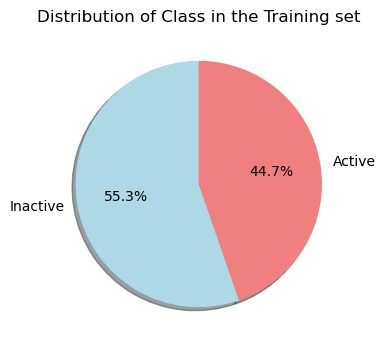

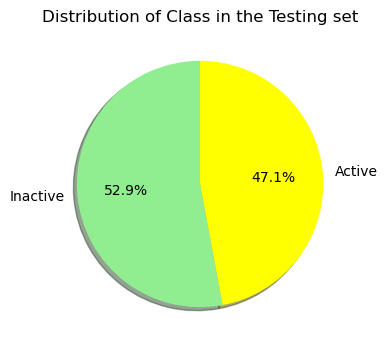

In [22]:
# Visualising the distribution of the 2 classes in both the training and testing sets

# Counting the occurence of the 2 classes in the 2 sets
train_distribution = y_train["Binary"].value_counts()
test_distribution = y_test["Binary"].value_counts()

print("The Distribution of the 2 classes in the training set is:", train_distribution)
print("The Distribution of the 2 classes in the testing set is:", test_distribution)


# Visualising occurence in the training set
target=["Inactive","Active"] # specifying the labels

plt.figure(figsize=(8,4)) # creating a figure
# creating a pie chart
# specifying colours and adding a shadow as well
plt.pie(train_distribution,labels = target, colors = ['lightblue', 'lightcoral'], autopct='%1.1f%%', startangle=90,  shadow=True)
plt.title ("Distribution of Class in the Training set") # specifying the title of the pie
plt.show() # displaying the plot

# Visualising occurence in the testing set
plt.figure(figsize=(8,4)) # creating a figure
# creating a pie chart
# specifying the colours and adding a shadow
plt.pie(test_distribution,labels = target, colors = ['lightgreen', 'yellow'], autopct='%1.1f%%', startangle=90, shadow=True)
plt.title ("Distribution of Class in the Testing set") # adding a title
plt.show() # displaying the plot

# The difference in the distribution of the 2 classes in both the training and testings sets is minimal

In [23]:
# Checking the subject-wise split

# Specifying the paths to the subject ids files for both the training and testing files 
subject_train_path = PATH + "\\train\\subject_train.txt"
subject_test_path = PATH + "\\test\\subject_test.txt"

# Loading the files
subject_train = pd.read_csv(subject_train_path, sep="\s+", header=None, names=["Subject_id"])
subject_test = pd.read_csv(subject_test_path , sep="\s+", header=None, names=["Subject_id"])


# Getting their unique values
unique_train = set(subject_train["Subject_id"].unique())
unique_test = set(subject_test["Subject_id"].unique())

# Displaying the unique number of subjects in each dataset

print(f"Number of unique subjects in the training set: {len(unique_train)}")
print(f"Number of unique subjects in the testing set: {len(unique_test)}")
print("Subject ids in the training set:",unique_train)
print("Subject ids in the testing set:",unique_test)


# There isnt any overlap, each has unique subjects ids
# The model therefore will be tested on unseen subjects 

Number of unique subjects in the training set: 21
Number of unique subjects in the testing set: 9
Subject ids in the training set: {1, 3, 5, 6, 7, 8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26, 27, 28, 29, 30}
Subject ids in the testing set: {2, 4, 9, 10, 12, 13, 18, 20, 24}


In [24]:
# Features have already been normalised according to the dataset description (Readme.txt)


In [25]:
# Reducing the number of features of the dataset by using PCA
from sklearn.decomposition import PCA  # importing the relevant library

PCA=PCA(n_components=0.95) # choosing to keep 95% of the variance, so we dont loose much of the original information which could affect negatively the performance of the model
X_train_reduced=PCA.fit_transform(X_train) # applying PCA to the features of the training set
X_test_reduced=PCA.transform(X_test)  # applying PCA to the features of the testing set

# Checking the number of components used for PCA
print("Number of components for PCA:",PCA.n_components_)  


#print(X_train_reduced)
#print(X_test_reduced)

# the features have been reduced from 561 to 67 components while keeping 95% of the variance

Number of components for PCA: 67


In [26]:
# Converting the training sets into 1-d arrays
y_train_final=y_train.values.ravel()  
y_test_final=y_test.values.ravel() 
print(y_train_final)
print(y_test_final)

[0 0 0 ... 1 1 1]
[0 0 0 ... 1 1 1]


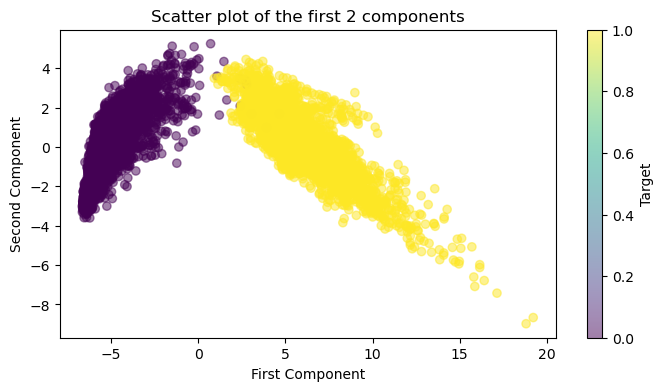

In [27]:
# Plotting the first 2 components to understand if data might be linearly seperable

import matplotlib.pyplot as plt
plt.figure(figsize=(8,4)) # creating a figure
plt.scatter(X_train_reduced[ : ,0],X_train_reduced[ : ,1], c= y_train_final, cmap="viridis", alpha = 0.5) # creating scatterplot
plt.xlabel("First Component")  # specifying the title for the x-axis
plt.ylabel("Second Component") # specifying title for the y-axis
plt.title("Scatter plot of the first 2 components") # adding title to the plot
plt.colorbar(label = "Target")
plt.show()  # displaying the plot


# The first 2 components show a clear separation of the 2 classes with little overlapping between them and a few outliers as well

In [28]:
import numpy as np

# Checking how much of the variance each component explains
explained_variance = PCA.explained_variance_ratio_
#print(explained_variance)

# Checking how much of the variance the first 2 components explain
variance_first=explained_variance[0]  
variance_second=explained_variance[1]

variance_total= (variance_first + variance_second) * 100
print(" The first 2 components explain :", variance_total)

 The first 2 components explain : 67.46746270487954


In [29]:
# Training Baseline SVM models using different kernels
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Using a Linear Kernel
SVM_linear=SVC(kernel="linear",random_state=42)
SVM_linear.fit(X_train_reduced,y_train_final)

# Predicting on the test set
y_pred_linear=SVM_linear.predict(X_test_reduced)

# Evaluating the performance of the model
accuracy_linear=accuracy_score(y_test_final,y_pred_linear)
print("The accuracy of the model (Linear Kernel) is:",accuracy_linear)
print(classification_report(y_test_final,y_pred_linear))


# The baseline model using a linear kernel has an accuracy of 100% so the data is mostly linearly separable

The accuracy of the model (Linear Kernel) is: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1560
           1       1.00      1.00      1.00      1387

    accuracy                           1.00      2947
   macro avg       1.00      1.00      1.00      2947
weighted avg       1.00      1.00      1.00      2947



In [30]:
# Using a Polynomial Kernel
SVM_polynomial=SVC(kernel="poly",random_state=42)
SVM_polynomial.fit(X_train_reduced,y_train_final)

# Predicting on the test set
y_pred_polynomial=SVM_polynomial.predict(X_test_reduced)

# Evaluating the performance of the model
accuracy_polynomial=accuracy_score(y_test_final,y_pred_polynomial)
print("The accuracy of the model (Polynomial Kernel) is:",accuracy_polynomial)
print(classification_report(y_test_final,y_pred_polynomial))


# The baseline model using a polynomial kernel has an accuracy of 99,93%, slighly lower than the Linear kernel

The accuracy of the model (Polynomial Kernel) is: 0.999321343739396
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1560
           1       1.00      1.00      1.00      1387

    accuracy                           1.00      2947
   macro avg       1.00      1.00      1.00      2947
weighted avg       1.00      1.00      1.00      2947



In [31]:
# Using Radial Basis Function (RBF) Kernel
SVM_rbf=SVC(kernel="rbf",random_state=42)
SVM_rbf.fit(X_train_reduced,y_train_final)

# Predicting on the test set
y_pred_rbf=SVM_rbf.predict(X_test_reduced)

# Evaluating the performance of the model
accuracy_rbf=accuracy_score(y_test_final,y_pred_rbf)
print("The accuracy of the model (RBF Kernel) is:",accuracy_rbf)
print(classification_report(y_test_final,y_pred_rbf))


# The baseline model using a rbf kernel has an accuracy of 100% as well

The accuracy of the model (RBF Kernel) is: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1560
           1       1.00      1.00      1.00      1387

    accuracy                           1.00      2947
   macro avg       1.00      1.00      1.00      2947
weighted avg       1.00      1.00      1.00      2947



In [32]:
# Peforming Hyperparameter tuning to find best hyperparameters for the model, including the best kernel (using the give code)

# Importing relevant libraries
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
 
# Defining the hyperparameter grid
grid = [
    {
        'kernel': ['linear'],   # specifying the kernel type
        'C': [0.1, 1, 10, 100]  # specifying values for C also called Regularisation
    },
    {
        'kernel': ['poly'], # specifying the kernel type
        'C': [0.1, 1],      # specifying values for C also called Regularisation
        'degree': [2, 3],  #  specifying the degree of the kernel
        'gamma': [0.001, 0.01, 0.1]  # specifying values for the gamma parameter
    },
    {
        'kernel': ['rbf'], # specifying the kernel type
        'C': [0.1, 1, 10],  # specifying values for C also called Regularisation
        'gamma': [0.001, 0.01,0.1 ]  # specifying values for the gamma parameter
    }
]

# Setting up GridSearchCV
grid_search = GridSearchCV(
    estimator=SVC(),  # specifying model for classification
    param_grid=grid,  # stating the grid to be searched
    scoring='accuracy',  # specifying an evaluation metric: accuracy in this case
    cv=3,    # setting the number of folds for the cross-validation process to be 3
    n_jobs=-1, 
    verbose=1  # printing progress
)

# Fitting the grid search
grid_search.fit(X_train_reduced, y_train_final)

# Printing the best parameters 
print("Best Parameters:", grid_search.best_params_)
# Printing the best cross-validation accuracy
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Predicting on the testing set
y_pred = grid_search.predict(X_test_reduced)

# Evaluating the performance of the model
print(f"Test Accuracy: {accuracy_score(y_test_final, y_pred):.4f}")
print(classification_report(y_test_final, y_pred)) # displaying the whole classification report 


# Using 3 folds as 5 was computationally more expensive, taking much longer to train 
# Testing accuracy is consistent with cross validation which indicates that the model generalises well to the unseen data
# and there are no signs of overfitting( good performance on training, but low on testing)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best Parameters: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9993200054399565
Test Accuracy: 0.9993
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1560
           1       1.00      1.00      1.00      1387

    accuracy                           1.00      2947
   macro avg       1.00      1.00      1.00      2947
weighted avg       1.00      1.00      1.00      2947



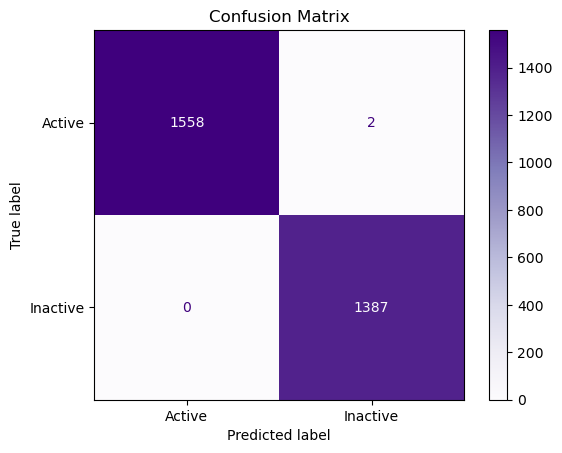

In [50]:
# Plotting a confusion matrix to visualise performance across the 2 classes

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(y_test_final, y_pred) # creating the confusion matrix
matrix = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=["Active","Inactive"]) # displaying the matrix
matrix.plot(cmap="Purples")  # specifying colour for the plot
plt.title("Confusion Matrix") # specifying title for the plot
plt.show() # displaying the plot 

In [ ]:
# Given the confusion matrix, we can see that there are only 2 Active instances that were classified as Inactive
# Given that the Inactive (0) class is the slighly dominant one in both the training and testing sets, the result has logical ground